In [ ]:
import numpy as np;
import pandas as pd;

: 

In [2]:
try:
    df = pd.read_csv('/kaggle/input/spamdata/spam.csv', encoding='utf-8')
except UnicodeDecodeError:
  
    df = pd.read_csv('/kaggle/input/spamdata/spam.csv', encoding='latin1')
 


In [3]:
#Data Cleaning
#EDA
#Text Preprocessing
#Model Building
#Evaluation
#Improvement
#website
#Deploy

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
#drop last 3 cols
columns_to_drop = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']
existing_columns_to_drop = [col for col in columns_to_drop if col in df.columns]
df.drop(columns=existing_columns_to_drop, inplace=True)

In [6]:
#rename
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [7]:
df.sample(5)

,target,text
5246,ham,Haven't eaten all day. I'm sitting here starin...
588,ham,Ya srsly better than yi tho
4297,spam,WELL DONE! Your 4* Costa Del Sol Holiday or å£...
5014,ham,I think the other two still need to get cash b...
2225,ham,Alrite jod hows the revision goin? Keris bin d...


In [8]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [9]:
df['target']=encoder.fit_transform(df['target'])

In [10]:
df.duplicated().sum()


403

In [11]:
df=df.drop_duplicates('text')

In [12]:
#EDA
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

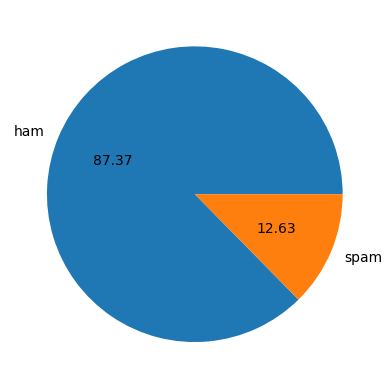

In [13]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [14]:
import nltk

In [15]:
#number of character
df['num_characters']=df['text'].apply(len)

In [16]:
#nums of words
df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df['nums_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [17]:
df['nums_sentence']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_characters,nums_words,nums_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [18]:
df[df['target']==0][['num_characters','nums_words','nums_sentence']].describe()

,num_characters,nums_words,nums_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,16.957484,1.815545
std,56.358207,13.394052,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,219.000000,38.000000


In [19]:
df[df['target']==1][['num_characters','nums_words','nums_sentence']].describe()

,num_characters,nums_words,nums_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.474732,2.969372
std,30.137753,6.893007,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,44.000000,9.000000


In [20]:
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_characters', ylabel='Count'>

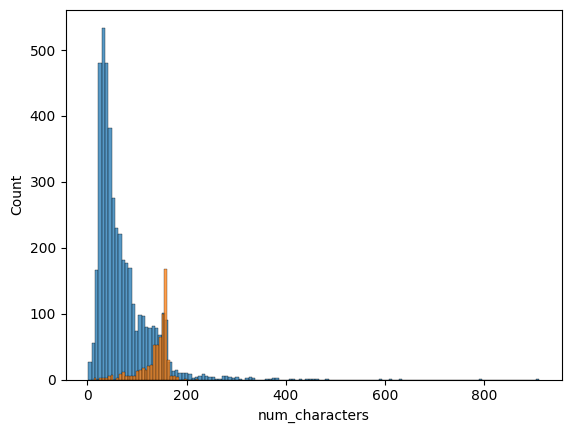

In [21]:
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

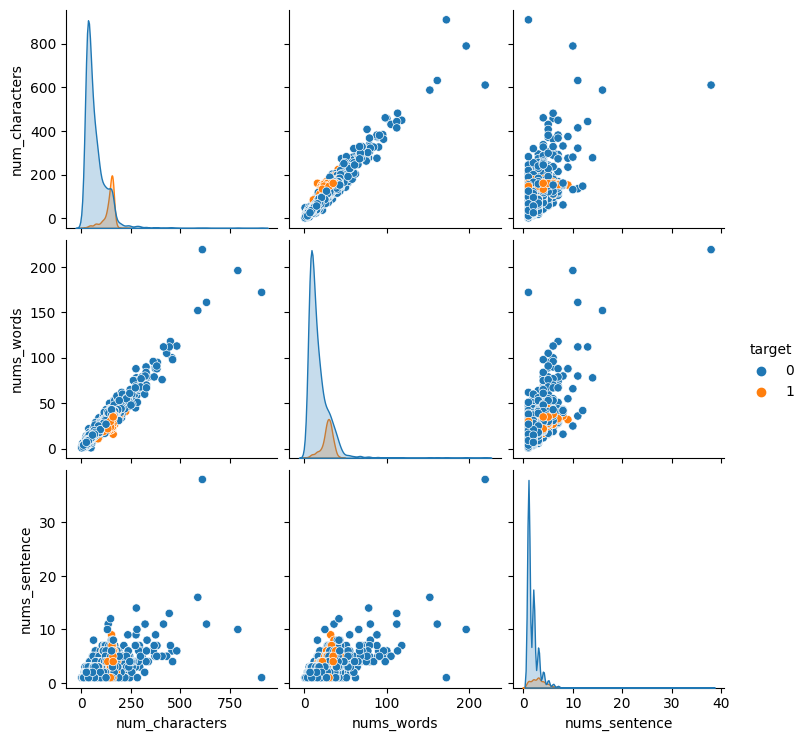

In [22]:
sns.pairplot(df,hue='target')

In [23]:
sns.heatmap(df.corr())

ValueError: could not convert string to float: 'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [36]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
import string


In [37]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text=y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string .punctuation:
            y.append(i)
            
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
        
    return" ".join(y)   


In [38]:
transform_text('i loved the yt lectures on machine learning. how about you?')

'love yt lectur machin learn'

In [40]:
df['transformed_text']=df['text'].apply(transform_text)

In [41]:
df.head()

,target,text,num_characters,nums_words,nums_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
from wordcloud import WordCloud
wc=WordCloud(width=500, height=500, min_font_size=10,background_color='white')

In [ ]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=' '))
plt.imshow(spam_wc)


In [ ]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=' '))
plt.imshow(spam_wc)

In [ ]:

df.head()

In [ ]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [ ]:
len(spam_corpus)

In [ ]:
from collections import Counter
counter = Counter(spam_corpus).most_common(30)
df = pd.DataFrame(counter, columns=['word', 'count'])
sns.barplot(x='word', y='count', data=df)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
ham_corpus=[]
for msg in df[df['target']==0]['transform_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [ ]:
df.head()

In [ ]:
len(ham_corpus)

In [ ]:
from collections import Counter
counter = Counter(ham_corpus).most_common(30)
df = pd.DataFrame(counter, columns=['word', 'count'])
sns.barplot(x='word', y='count', data=df)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
#model building

In [93]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer()

In [94]:
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [96]:
X.shape

(5169, 6629)

In [68]:
print(df.columns)

Index(['target', 'text', 'num_characters', 'nums_words', 'nums_sentence',
       'transformed_text'],
      dtype='object')


In [97]:
y=df['target'].values

In [98]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [101]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [102]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [103]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))


0.8704061895551257
[[787 109]
 [ 25 113]]
0.509009009009009


In [105]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))


0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [106]:
#tfidf -->mnb 
import pickle 
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))